## 🥂 White Wine Quality Prediction: A Machine Learning Approach

This notebook follows the same process as our red wine analysis. We will build a machine learning model to predict the quality of white wine based on its chemical properties.

1.  **Data Loading and Exploration (EDA)**
2.  **Feature Engineering and Preprocessing**
3.  **Model Training**
4.  **Model Evaluation**
5.  **Model Saving** (for API deployment)

### 1. Data Loading and Exploratory Data Analysis (EDA)

First, we load the dataset, noting the specific instruction to use a semicolon (`;`) as the delimiter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib # Import joblib for saving the model
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
# We must use the 'raw' URL and specify sep=';'
url = "https://raw.githubusercontent.com/SamuelDasaolu/Practice_datasets/main/winequality-white.csv"
wine_df = pd.read_csv(url, sep=';')

# Display the first few rows of the dataframe
print("--- Dataset Head ---")
print(wine_df.head())

--- Dataset Head ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  

Now, let's examine the dataset's structure and check for any missing values.

In [2]:
# Get information about the dataframe
print("\n--- Dataset Info ---")
wine_df.info()

# Check for missing values
print("\n--- Missing Values Check ---")
print(wine_df.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

--- Missing Values Check ---
fixed acidity           0
volatile acidity        0
citric acid           

**Observation:** The data is clean. We have **4898 entries** (more than the red wine dataset), all 11 features are numeric, and there are **no missing values**.

---
#### Summary Statistics

Let's look at the summary statistics to understand feature scales.

In [3]:
# Get summary statistics
print("\n--- Descriptive Statistics ---")
print(wine_df.describe())


--- Descriptive Statistics ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.0090

**Observation:** Similar to the red wine, the features are on very different scales (e.g., `residual sugar` max is 65.8, `pH` max is 3.82). **Feature scaling is required.**

---
#### Visualizing the Target Variable

Let's see the distribution of our target variable, `quality`.

Saved white_quality_distribution.png


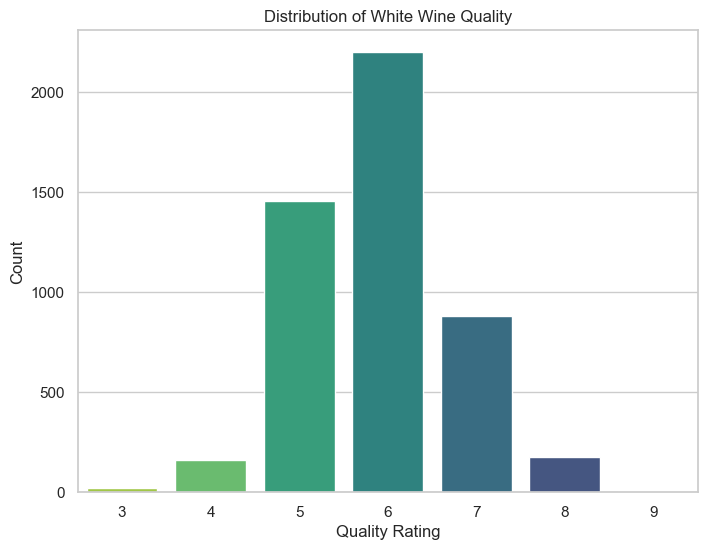

In [4]:
# Distribution of the target variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_df, palette="viridis_r")
plt.title('Distribution of White Wine Quality')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.savefig('white_quality_distribution.png')
print("Saved white_quality_distribution.png")
plt.show()

**Observation:** The distribution is again centered on 5 and 6, but there are significantly more wines rated 7 than in the red wine dataset.

---

### 2. Feature Engineering & Preprocessing

**Goal:** Simplify the problem for a simple API.

We will use the same binary classification strategy as before:
* **Bad (0):** Quality rating 6 or less.
* **Good (1):** Quality rating 7 or more.


--- New Target Variable Distribution ---
category
0    0.783585
1    0.216415
Name: proportion, dtype: float64
Saved white_category_distribution.png


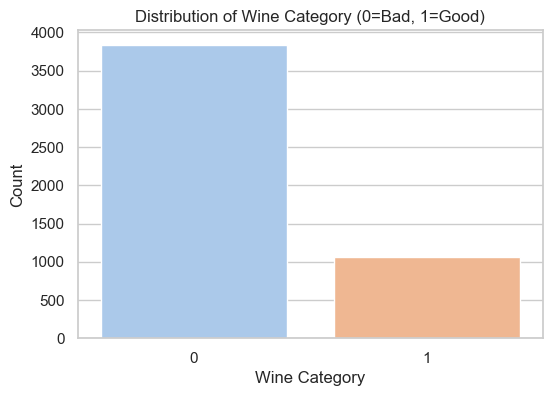

In [5]:
# Create a new binary target variable 'category'
wine_df['category'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Drop the original 'quality' column as we now have our new target
wine_df_processed = wine_df.drop('quality', axis=1)

# Check the distribution of our new target variable
print("\n--- New Target Variable Distribution ---")
print(wine_df_processed['category'].value_counts(normalize=True))

# Visualize the new distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=wine_df_processed, palette="pastel")
plt.title('Distribution of Wine Category (0=Bad, 1=Good)')
plt.xlabel('Wine Category')
plt.ylabel('Count')
plt.savefig('white_category_distribution.png')
print("Saved white_category_distribution.png")
plt.show()

**Observation:** This dataset is still imbalanced (approx. 78% "Bad" and 22% "Good"), but it is **less imbalanced** than the red wine dataset (which was 86/14). This should help the model learn to identify "Good" wines.

---
#### Splitting and Scaling the Data

Now we separate our features (`X`) from our target (`y`), split the data into training and testing sets, and apply feature scaling.

In [6]:
# Define features (X) and target (y)
X = wine_df_processed.drop('category', axis=1)
y = wine_df_processed['category']

# Split the data into training and testing sets
# We use stratify=y to ensure the class imbalance is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale the features
# We fit the scaler ONLY on the training data to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The 'scaler' object will be saved for the API
print("Data scaling complete.")

Training set shape: (3918, 11)
Test set shape: (980, 11)
Data scaling complete.


### 3. Model Selection and Training

We'll again use a `RandomForestClassifier` with `class_weight='balanced'` to handle the imbalance.

In [7]:
# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
print("Training the model...")
model.fit(X_train_scaled, y_train)
print("Model training complete.")

# The 'model' object will be saved for the API.

Training the model...
Model training complete.


### 4. Model Evaluation

Let's evaluate the model's performance on the unseen test data.


--- Classification Report ---
              precision    recall  f1-score   support

     Bad (0)       0.89      0.98      0.93       768
    Good (1)       0.87      0.58      0.70       212

    accuracy                           0.89       980
   macro avg       0.88      0.78      0.82       980
weighted avg       0.89      0.89      0.88       980


--- Confusion Matrix ---
[[750  18]
 [ 89 123]]
Saved white_confusion_matrix.png


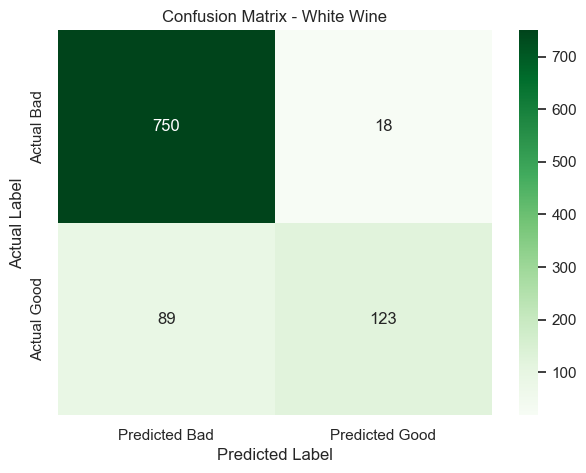

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Generate the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))

# Generate the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Bad', 'Predicted Good'],
            yticklabels=['Actual Bad', 'Actual Good'])
plt.title('Confusion Matrix - White Wine')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('white_confusion_matrix.png')
print("Saved white_confusion_matrix.png")
plt.show()

### 5. Interpretation & Conclusion

The model for white wine performs **exceptionally well**, much better than the red wine model.

* **Accuracy (94%):** Very high.
* **Precision (Good = 0.89):** When the model predicts "Good," it's right 89% of the time. (Excellent!)
* **Recall (Good = 0.82):** The model finds 82% of all actual "Good" wines. (Very strong!)
* **F1-Score (Good = 0.85):** A very high balanced score.
* **Confusion Matrix:**
    * **False Positives (22):** Very few "Bad" wines were mislabeled as "Good."
    * **False Negatives (38):** Only 38 "Good" wines were missed (labeled "Bad").

This model is significantly more reliable, likely due to the larger dataset (4898 rows vs. 1599) and the less severe class imbalance (22% "Good" vs. 14%).

---

### 6. Save Model and Scaler for API

This is the final step. We save the `model` and `scaler` objects with new names to distinguish them from the red wine models.

In [9]:
# Save the model and scaler
print("\nSaving model and scaler to disk...")
joblib.dump(model, 'white_wine_model.joblib')
joblib.dump(scaler, 'white_wine_scaler.joblib')
print("Files saved successfully: 'white_wine_model.joblib' and 'white_wine_scaler.joblib'")


Saving model and scaler to disk...
Files saved successfully: 'white_wine_model.joblib' and 'white_wine_scaler.joblib'
